# Análise do Data Warehouse - (Cursos Superior, Renda Familiar, IFPB)

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

In [5]:
table = 'fato_aluno_renda'
field = 'renda_familiar'
curse_types = ['Bacharelado','Licenciatura','Tecnologia']
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes'],
    'unidade_ensino': '',
    'instituicao': 'IFPB',
}

In [6]:
s = []
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,
                ','.join(map(str,["'{}'".format(i) for i in v]))))
filter_sql = " AND ".join(map(str,s))

In [7]:
# Análise de Sexo
sql = "SELECT categoria_situacao, {0}, tipo_curso, instituicao, unidade_ensino, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY categoria_situacao, {0}, tipo_curso, instituicao " \
" ALLOW FILTERING;".format(
    field, 
    table,
    filter_sql)
rslt = session.execute(sql, timeout=None)
df = rslt._current_rows
df

,categoria_situacao,renda_familiar,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,"0,5<RFP<=1,0",Bacharelado,IFPB,Campus Cajazeiras,51
1,Concluintes,"0,5<RFP<=1,0",Especialização (Lato Sensu),IFPB,Campus Cajazeiras,50
2,Concluintes,"0,5<RFP<=1,0",Licenciatura,IFPB,Campus Cajazeiras,37
3,Concluintes,"0,5<RFP<=1,0",Mestrado,IFPB,Campus João Pessoa,2
4,Concluintes,"0,5<RFP<=1,0",Qualificação Profissional (FIC),IFPB,Campus Avançado Cabedelo Centro,85
...,...,...,...,...,...,...
88,Evadidos,"RFP>3,5",Licenciatura,IFPB,Campus João Pessoa,9
89,Evadidos,"RFP>3,5",Mestrado Profissional,IFPB,Campus João Pessoa,1
90,Evadidos,"RFP>3,5",Qualificação Profissional (FIC),IFPB,Campus Itaporanga,1
91,Evadidos,"RFP>3,5",Tecnologia,IFPB,Campus Cabedelo,11


## Filtrando Tipo do Curso

In [8]:
if curse_types :
    df = df[df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
df

Fitrando pelos tipos de cursos:
 Bacharelado, Licenciatura, Tecnologia


,categoria_situacao,renda_familiar,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,"0,5<RFP<=1,0",Bacharelado,IFPB,Campus Cajazeiras,51
2,Concluintes,"0,5<RFP<=1,0",Licenciatura,IFPB,Campus Cajazeiras,37
5,Concluintes,"0,5<RFP<=1,0",Tecnologia,IFPB,Campus Cabedelo,185
7,Concluintes,"0<RFP<=0,5",Bacharelado,IFPB,Campus Cajazeiras,66
9,Concluintes,"0<RFP<=0,5",Licenciatura,IFPB,Campus Cajazeiras,91
12,Concluintes,"0<RFP<=0,5",Tecnologia,IFPB,Campus Cabedelo,343
14,Concluintes,"1,0<RFP<=1,5",Bacharelado,IFPB,Campus Cajazeiras,31
16,Concluintes,"1,0<RFP<=1,5",Licenciatura,IFPB,Campus Cajazeiras,14
18,Concluintes,"1,0<RFP<=1,5",Tecnologia,IFPB,Campus Cabedelo,75
20,Concluintes,"1,5<RFP<=2,5",Bacharelado,IFPB,Campus Cajazeiras,21


## Agrupando

In [9]:
df = df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()

<AxesSubplot:xlabel='renda_familiar'>

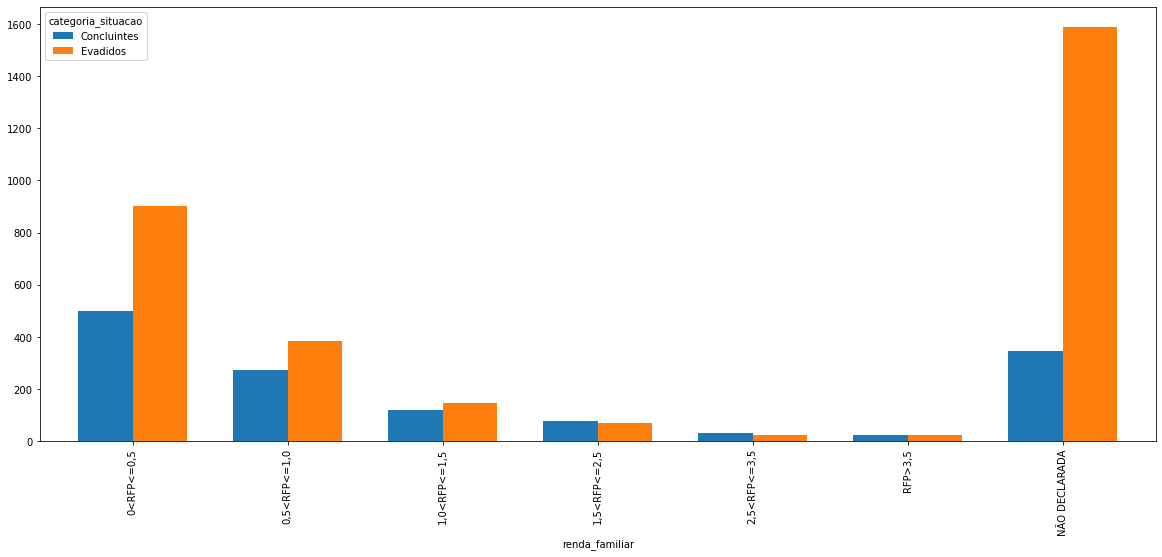

In [10]:
x = df.pivot_table('quant_grupo',[field],'categoria_situacao')
#x = df.pivot_table('quant_grupo',['categoria_situacao'],field)
order = ['0<RFP<=0,5','0,5<RFP<=1,0','1,0<RFP<=1,5','1,5<RFP<=2,5','2,5<RFP<=3,5','RFP>3,5','NÃO DECLARADA']
x.reindex(order).plot(kind ='bar', figsize=(20, 8), width = 0.7)

## Total de Alunos

In [11]:
#df[field]
df.groupby([field]).sum('quant_grupo')['quant_grupo'].reindex(order)

renda_familiar
0<RFP<=0,5       1402
0,5<RFP<=1,0      658
1,0<RFP<=1,5      266
1,5<RFP<=2,5      149
2,5<RFP<=3,5       56
RFP>3,5            50
NÃO DECLARADA    1933
Name: quant_grupo, dtype: int64

In [12]:
#df[field]
df.groupby(['categoria_situacao', field]).sum('quant_grupo')['quant_grupo']

categoria_situacao  renda_familiar
Concluintes         0,5<RFP<=1,0       273
                    0<RFP<=0,5         500
                    1,0<RFP<=1,5       120
                    1,5<RFP<=2,5        79
                    2,5<RFP<=3,5        32
                    NÃO DECLARADA      346
                    RFP>3,5             26
Evadidos            0,5<RFP<=1,0       385
                    0<RFP<=0,5         902
                    1,0<RFP<=1,5       146
                    1,5<RFP<=2,5        70
                    2,5<RFP<=3,5        24
                    NÃO DECLARADA     1587
                    RFP>3,5             24
Name: quant_grupo, dtype: int64

In [13]:
print("Total de aluns: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de aluns: 4.514
